In [1]:
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter

from module_.dataLoader import dataLoader
from module_.featureExtraction import feature_extraction
from module_.changePointDetection import change_point_detection

from module_.info.config import feature_name

In [2]:
episodes, transitions, labels = dataLoader("testbed")

In [ ]:
from module_.validation import check_active_state_order

threshold = 2

fig = plt.figure(figsize=(20, 5))
ax = plt.axes()
colorstring = "bgrcmk"

sensors = set()
for events in episodes:
    sensors = sensors | set(events[:,0])
sensors = sorted(sensors)

for i in range(len(episodes)):

    if i<6:
        continue

    episode, transition, label = episodes[i], transitions[i], labels[i]

    active_dict = check_active_state_order(episode, "testbed")

    ax.set_title('Active State of {}'.format(label))
    ax.set_xlabel("Event"); ax.set_ylabel("Sensor")
    ax.set_yticks(range(1, len(active_dict.keys())+1))
    ax.set_yticklabels(active_dict.keys())

    for i, item in enumerate(active_dict.items()):
        k, v = item
        for fragment in v:
            # if fragment[0]>=0 and fragment[1]<=transition_time_r:
                # print(k, fragment)
            coloridx = sensors.index(k)
            ax.hlines(y=i+1, xmin=fragment[0], xmax=fragment[1], linewidth=3, 
                color=colorstring[coloridx%len(colorstring)]
            )

    plt.axvspan(transition-1, transition, 
        facecolor='g', alpha=0.2, label="transition"
    )

    break

In [ ]:
from module_.validation import check_active_state

threshold = 2

fig = plt.figure(figsize=(20, 5))
ax = plt.axes()
colorstring = "bgrcmk"

sensors = set()
for events in episodes:
    sensors = sensors | set(events[:,0])
sensors = sorted(sensors)

for i in range(len(episodes)):
    episode, transition, label = episodes[i], transitions[i], labels[i]

    # print(episode[:10])


    active_dict = check_active_state(episode, "testbed")

    start_time = float(episode[0,2])
    transition_time_l = float(episode[transition-1,2])-start_time
    transition_time_r = float(episode[transition,2])-start_time

    ax.set_title('Active State of {}'.format(label))
    ax.set_xlabel("Timestamp"); ax.set_ylabel("Sensor")
    ax.set_yticks(range(1, len(active_dict.keys())+1))
    ax.set_yticklabels(active_dict.keys())

    for i, item in enumerate(active_dict.items()):
        k, v = item
        for fragment in v:
            # if fragment[0]>=0 and fragment[1]<=100:
                # print(k, fragment)
            coloridx = sensors.index(k)
            ax.hlines(y=i+1, xmin=fragment[0], xmax=fragment[1], linewidth=3, color=colorstring[coloridx%len(colorstring)])
    
    plt.axvline(
        x=transition_time_l, color="g", linestyle=":"
    )
    plt.axvline(
        x=transition_time_r, color="g", linestyle=":"
    )
    plt.axvspan(max(0, transition_time_l-threshold), min(transition_time_r+threshold, float(episode[-1,2])-float(episode[0,2])), 
        facecolor='g', alpha=0.2, label="transition"
    )

    plt.legend()

    break

Text(0.5, 1.0, 'C0-P19')

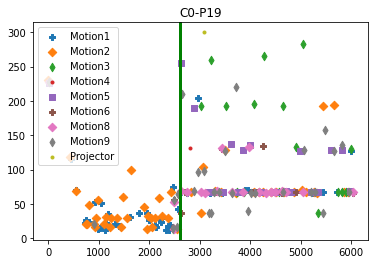

In [52]:
idx = 33

episode = episodes[idx]
transition = transitions[idx]
label = labels[idx]

sensor_list = sorted(set(episode[:,0]))

active_states = {item: [] for item in sensor_list}
current_state = {item: False for item in sensor_list}
active_start = {item: 0. for item in sensor_list}

for i in range(len(episode)):
    s, v, t = episode[i][:3]
    t = float(t)-float(episode[0][2])

    if v.lower() in ["on", "open", "true"]:
        if current_state[s]==False:
            active_start[s] = t
            current_state[s] = True
    elif v.lower() in ["off", "close", "false"]:
        if current_state[s]==True:
            active_states[s].append(
                (active_start[s], t)
            )
            current_state[s] = False
    
    for ck, cv in current_state.items():
        if cv==True and t-active_start[ck]>300.:
            active_states[ck].append(
                (active_start[ck], active_start[ck]+300.)
            )
            current_state[ck] = False


x = []
markerstring = ".sPDd"
for i, j in enumerate(active_states.items()):
    k, v = j
    data = []
    # print(k)
    index = sensor_list.index(k)
    if len(v)==0: continue
    for vv in v:
        data.append([vv[0], vv[1]-vv[0]])
        # label.append(index)
    x+=data
    data = np.array(data)
    # print(data)
    plt.scatter(data[:,0], data[:,1], label=k, marker=markerstring[i%len(markerstring)]) 
plt.legend()
plt.axvspan(float(episode[transition-1,2])-float(episode[0][2]),
    float(episode[transition,2])-float(episode[0][2]), color="g")
plt.title(label)
# print(episode)